### Creating Classification Data

In [47]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)

In [48]:
print(X.shape)
print(y.shape)

(100, 2)
(100,)


In [49]:
import matplotlib.pyplot as plt

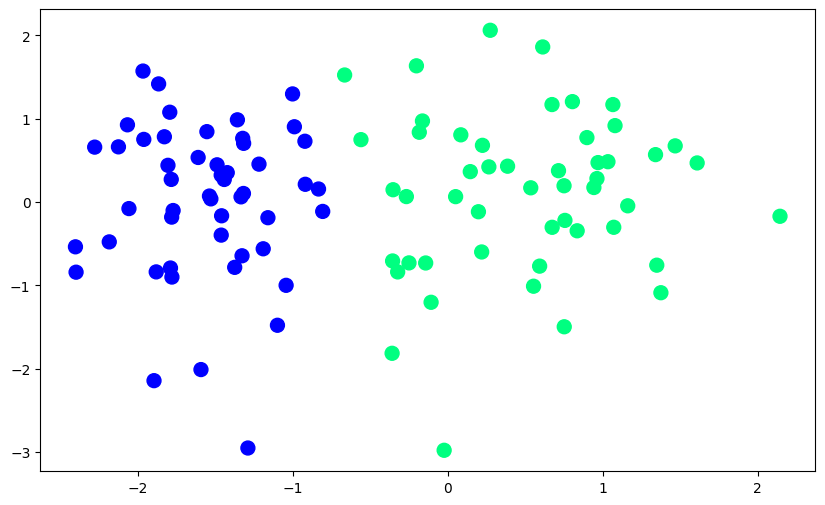

In [50]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1], c=y, cmap='winter', s=100)

In [51]:
def step(z):
  return 1 if z>0 else 0

In [52]:
def perceptron(X, y):
  X = np.insert(X, 0, 1, axis=1) #adding one for bias term
  weights = np.ones(X.shape[1])
  lr = 0.1

  for i in range(1000):
    j = np.random.randint(0, 100-1) #random j from [0,100)
    y_hat = step(np.dot(X[j], weights)) #prediction
    weights = weights + lr*(y[j]-y_hat)*X[j] #update weights/coefs

  coef_ = weights[1:]
  intercept_ = weights[0]
  return intercept_, coef_

In [53]:
intercept_, coef_ = perceptron(X,y)

In [54]:
print(coef_)
print(intercept_)

[1.39942685 0.12576459]
1.0


In [55]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [56]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

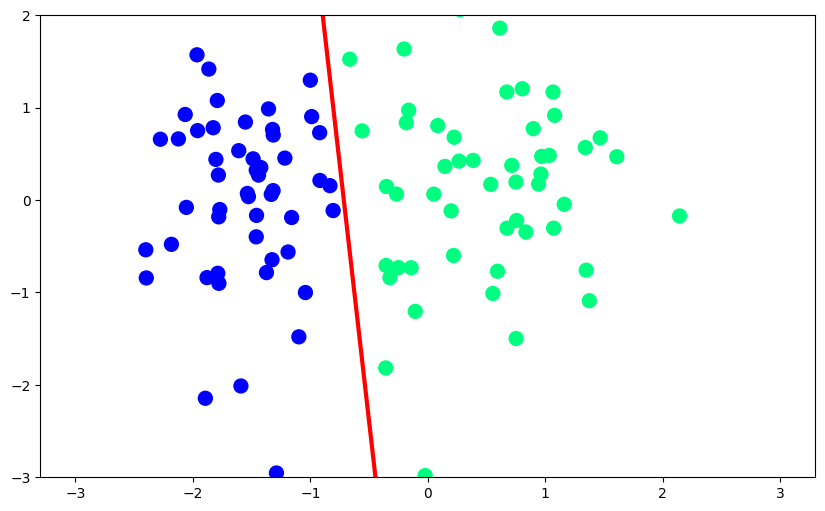

In [57]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

### Animation for the classification using Perceptron Trick

y = mx + b (slope form)

w0 + w1x1 + w2x2 = 0 (In weighted form)

*   m = -w1/w2
*   b = -w0/w2






In [58]:
def perceptron(X,y):

  m = []
  b = []

  X = np.insert(X,0,1,axis=1)
  weights = np.ones(X.shape[1])
  lr = 0.1

  for i in range(200): # 200 iterations
    j = np.random.randint(0,100)
    y_hat = step(np.dot(X[j],weights))
    weights = weights + lr*(y[j]-y_hat)*X[j]

    m.append(-(weights[1]/weights[2])) # m = -w1/w2
    b.append(-(weights[0]/weights[2])) # b = -w0/w2

  return m,b

In [59]:
m,b = perceptron(X,y)

In [60]:
len(m), len(b)

(200, 200)

In [61]:
# %matplotlib notebook
# from matplotlib.animation import FuncAnimation
# import matplotlib.animation as animation

In [62]:
# fig, ax = plt.subplots(figsize=(9,5))

# x_i = np.arange(-3, 3, 0.1)
# y_i = x_i*m[0] +b[0]
# ax.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
# line, = ax.plot(x_i, x_i*m[0] +b[0] , 'r-', linewidth=2)
# plt.ylim(-3,3)

# def update(i):
#   label = 'epoch {0}'.format(i + 1)
#   line.set_ydata(x_i*m[i] + b[i])
#   ax.set_xlabel(label)
#   # return line, ax

# anim = FuncAnimation(fig, update, repeat=True, frames=200, interval=100)

In [63]:
# from IPython.display import HTML
# HTML(anim.to_jshtml())

### Logistic Regression using Sklearn library

In [64]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(X,y)

LogisticRegression()

In [65]:
print(lor.coef_)
print(lor.intercept_)

[[3.50144121 0.02773483]]
[2.25106636]


In [66]:
m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_/lor.coef_[0][1])

In [67]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input + b

In [68]:
print(x_input1.shape)
print(y_input1.shape)

(100,)
(100,)


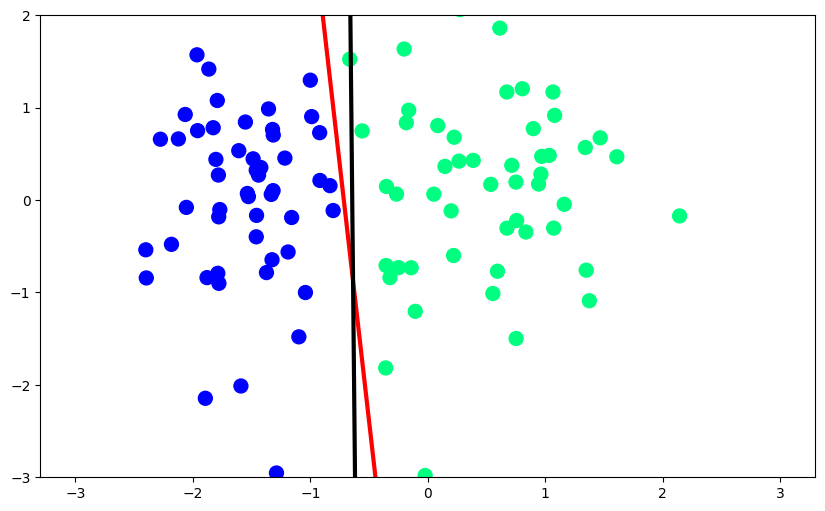

In [69]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)
plt.show()